# ULTIMATE GUITAR TABLATURES SCRAPING

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.1 Looking around the top page to get tabs infos and urls

First of all, we start by looking at the top page for chords tablatures.

In [3]:
result = requests.get("https://www.ultimate-guitar.com/explore?order=hitstotal_desc&part[]=&type[]=Chords")

In [31]:
c = result.content

In [32]:
soup = BeautifulSoup(c, "lxml")

In [33]:
soup

<!DOCTYPE html>
<html lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<title>Explore tabs filtered by chords, whole song @ Ultimate-Guitar.Com</title>
<meta content="Hallelujah Chords by Jeff Buckley, All Of Me Chords by John Legend, Let Her Go Chords by Passenger and other tabs filtered by chords, whole song @ Ultimate-Guitar.Com" name="description"/>
<meta content="" name="keywords"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=1280, minimum-scale=0.1, maximum-scale=5.0" name="viewport"/>
<meta content="#294961" name="theme-color"/>
<link href="https://fonts.googleapis.com/" rel="dns-prefetch"/>
<link href="https://chrome.google.com/webstore/detail/cpjmidngbpgnobnojpjgkidfnapkbieg" rel="chrome-webstore-item"/>
<meta content="_csrf" name="csrf-param"/>
<meta content="IwFOoOEVAQdCojd8spnUzJmRLydooktDBi2zNpkZX29MRgLG1iU2TyHBDgzl1Iv_ycN6E0XnLgJcXYFUyH8xVg==" name="csrf-token"/>
<lin

We find that the 9th scripts contains a huge JSON with all the relevant informations.

In [71]:
data = soup.find_all('script')[8].string

In [132]:
p = re.compile('\n.*window.UGAPP.store.page = (.*);.*')
m = p.match(data)
full_json = json.loads(m.groups()[0])

In [221]:
full_json

{'data': {'active_filters': [{'param_name': 'type',
    'values': [{'name': 'Chords', 'url_name': 'Chords'}]},
   {'param_name': 'part', 'values': [{'name': 'Whole song', 'url_name': ''}]},
   {'param_name': 'live', 'values': [{'name': 'Original', 'url_name': '0'}]},
   {'param_name': 'genres', 'values': [{'name': 'Blues', 'url_name': '99'}]}],
  'data': {'hits': [{'hits': '583', 'id': '19832'},
    {'hits': '576', 'id': '880131'},
    {'hits': '507', 'id': '990750'},
    {'hits': '558', 'id': '1250024'},
    {'hits': '699', 'id': '1396336'},
    {'hits': '833', 'id': '1400649'},
    {'hits': '645', 'id': '1400788'},
    {'hits': '623', 'id': '1404134'},
    {'hits': '521', 'id': '1416161'},
    {'hits': '339', 'id': '1416164'},
    {'hits': '420', 'id': '1453464'},
    {'hits': '676', 'id': '1468821'},
    {'hits': '856', 'id': '1479201'},
    {'hits': '586', 'id': '1668337'},
    {'hits': '571', 'id': '1672809'},
    {'hits': '459', 'id': '1702864'},
    {'hits': '606', 'id': '172334

### 1.2 Clean and modular version to scrape 400 top tabs for main genres

We decide to take the top 400 of all the possibles genres (meaning with enough tabs). There turns out to be 13 genres that span most of the usual musical spectrum.

In [2]:
result = requests.get("https://www.ultimate-guitar.com/explore?live[]=0&order=hitstotal_desc&part[]=&type[]=Chords")
soup = BeautifulSoup(result.content, "lxml")
data = soup.find_all('script')[8].string
p = re.compile('\n.*window.UGAPP.store.page = (.*);.*')
m = p.match(data)
full_json = json.loads(m.groups()[0])
genres = full_json['data']['filters'][1]['values']
genres

[{'count': 111337, 'name': 'Rock', 'url_name': 4},
 {'count': 29310, 'name': 'Folk', 'url_name': 666},
 {'count': 22729, 'name': 'Pop', 'url_name': 14},
 {'count': 19653, 'name': 'Country', 'url_name': 49},
 {'count': 6234, 'name': 'Electronic', 'url_name': 16},
 {'count': 5126, 'name': 'Rhythm And Blues', 'url_name': 70},
 {'count': 3451, 'name': 'Metal', 'url_name': 8},
 {'count': 2434, 'name': 'Contemporary R&b', 'url_name': 434},
 {'count': 1814, 'name': 'Religious Music', 'url_name': 1016},
 {'count': 1653, 'name': 'Hip Hop', 'url_name': 45},
 {'count': 1239, 'name': 'Reggae', 'url_name': 19},
 {'count': 889, 'name': 'Jazz', 'url_name': 84},
 {'count': 550, 'name': 'Blues', 'url_name': 99},
 {'count': 291, 'name': 'World Music', 'url_name': 195},
 {'count': 268, 'name': 'Disco', 'url_name': 85},
 {'count': 117, 'name': 'Comedy', 'url_name': 79},
 {'count': 68, 'name': 'New Age', 'url_name': 695},
 {'count': 41, 'name': 'Classical', 'url_name': 216},
 {'count': 16, 'name': 'Soundtr

In [3]:
nb_tabs = 400
nb_pages = int(nb_tabs/50)

df = pd.DataFrame(columns=["Title", "Artist", "Genre", "URL", "Hits"])

for genre in genres:
    if genre['count']>nb_tabs:
        print("Scraping "+genre['name']+" :")
        for page in range(nb_pages):
            print("\t Page "+str(page+1))
            result = requests.get("https://www.ultimate-guitar.com/explore?genres[]="+str(genre['url_name'])+"&live[]=0&order=hitstotal_desc&page="+str(page+1)+"&part[]=&type[]=Chords")
            soup = BeautifulSoup(result.content, "lxml")
            data = soup.find_all('script')[8].string
            p = re.compile('\n.*window.UGAPP.store.page = (.*);.*')
            m = p.match(data)
            full_json = json.loads(m.groups()[0])
            for tab in full_json['data']['data']['tabs']:
                h = next(hits['hits'] for hits in full_json['data']['data']['hits'] if int(hits['id']) == tab['id'])
                df = df.append({
                    "Title": tab['song_name'],
                    "Artist":  tab['artist_name'],
                    "Genre": genre['name'],
                    "URL": tab['tab_url'],
                    "Hits": int(h)
                    }, ignore_index=True)
        print("-"*25)
print("DONE")

Scraping Rock :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Folk :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Pop :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Country :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Electronic :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Rhythm And Blues :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Metal :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Contemporary R&b :
	 Page 1
	 Page 2
	 Page 3
	 Page 4
	 Page 5
	 Page 6
	 Page 7
	 Page 8
-------------------------
Scraping Religious Music :
	 Page 1
	 Page 2
	 Page 3
	

We compile all our results in a single dataframe :

In [4]:
df

,Title,Artist,Genre,URL,Hits
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766
9,Let It Be,The Beatles,Rock,https://tabs.ultimate-guitar.com/tab/the_beatl...,8786451


### 2. General stats

In [240]:
df.describe()

,Title,Artist,Genre,URL,Hits
count,5200,5200,5200,5200,5200
unique,2969,914,13,4599,4835
top,What A Wonderful World,Taylor Swift,Country,https://tabs.ultimate-guitar.com/tab/taylor_sw...,721156
freq,22,144,400,3,3


We see here that we have 4599 unique tablatures with the title of the song, name of the artist, musical genre, the URL of the tab and how many times it was clicked. There is only 2969 different songs because of covers and there is not 5200 different tabs because some of them appear in multiple genres, we decided to keep that for now, we will probably discard the duplicates for the general analysis but it is interesting to keep them in order to analyse the different genres. And finally we have 914 different artists, let's see their repartition :

In [361]:
df.Artist.value_counts()

Taylor Swift               144
Hillsong United             87
Adele                       77
twenty one pilots           71
Frank Sinatra               55
Rihanna                     55
Justin Bieber               49
Ed Sheeran                  47
Michael Jackson             47
Chris Tomlin                47
Bob Dylan                   43
Johnny Cash                 42
Norah Jones                 42
Tom Waits                   42
Louis Armstrong             40
Casting Crowns              39
Jason Mraz                  37
Jesus Culture               34
Elvis Presley               32
Lady Gaga                   31
Metallica                   31
Katy Perry                  31
Drake                       30
Amy Winehouse               29
Ray Charles                 29
Avenged Sevenfold           29
Bob Marley                  29
Eminem                      29
Ariana Grande               29
Linkin Park                 28
                          ... 
Shakira                      1
The Cine

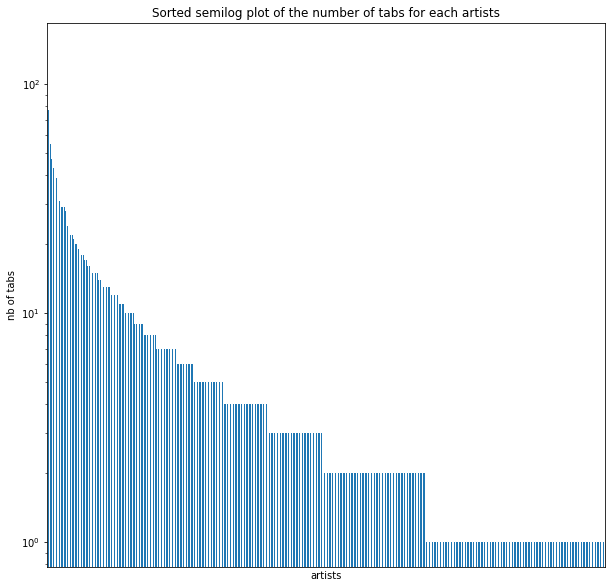

In [375]:
plt.figure(figsize=(10,10))
df.Artist.value_counts().plot(kind='bar', logy=True)
ax1 = plt.axes()
ax1.set_xticks([])  
plt.xlabel('artists')
plt.ylabel('nb of tabs')
plt.title("Sorted semilog plot of the number of tabs for each artists")
plt.show()

Quite interestingly but not totally surprisingly, it looks like a power law repartition, with Taylor Swift at an overwhelming maximum of 144 tabs and then the majority of the artists below 5 tabs. We are unsure for now if this is something we want to remedy, so we decide to keep it this way until the analysis. 

We can now take a look at the songs repartition :

In [376]:
df.Title.value_counts()

What A Wonderful World              22
Georgia On My Mind                  14
Im Yours                            14
Hallelujah                          14
Take Me Home Country Roads          13
Hurt                                11
Unfaithful                          11
Wrecking Ball                       11
Oceans Where Feet May Fail          11
Crazy                               11
Make You Feel My Love               10
Happy                               10
At Last                             10
Rolling In The Deep                 10
Big Girls Dont Cry                  10
If I Aint Got You                   10
Hosanna                              9
Dont Know Why                        9
Knockin On Heavens Door              9
Brown Eyed Girl                      9
Hold On Were Going Home              9
My Way                               9
Stay                                 9
All Of Me                            8
Hello                                8
Bubbly                   

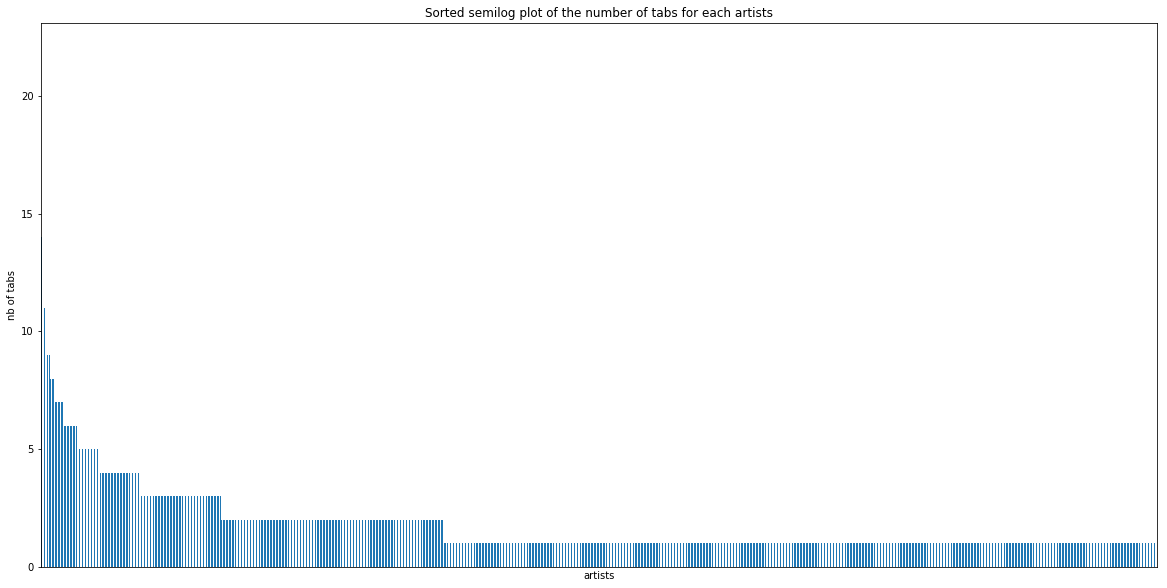

In [380]:
plt.figure(figsize=(20,10))
df.Title.value_counts().plot(kind='bar')
ax1 = plt.axes()
ax1.set_xticks([])  
plt.xlabel('artists')
plt.ylabel('nb of tabs')
plt.title("Sorted plot of the number of tabs for each song")
plt.show()

Besides some outliers (a few dozen), most songs have been tabbed less than 5 times in the dataset.

We are still considering removing all duplicates by scraping only unseen songs until the desired number is reached.

In [399]:
df.URL.value_counts()

https://tabs.ultimate-guitar.com/tab/taylor_swift/you_belong_with_me_chords_820313                        3
https://tabs.ultimate-guitar.com/tab/michael_jackson/man_in_the_mirror_chords_517579                      3
https://tabs.ultimate-guitar.com/tab/macy_gray/i_try_chords_49101                                         3
https://tabs.ultimate-guitar.com/tab/katy_perry/thinking_of_you_chords_331629                             3
https://tabs.ultimate-guitar.com/tab/bob_dylan/knockin_on_heavens_door_chords_681951                      3
https://tabs.ultimate-guitar.com/tab/john_denver/annies_song_chords_38904                                 3
https://tabs.ultimate-guitar.com/tab/taylor_swift/you_belong_with_me_chords_752550                        3
https://tabs.ultimate-guitar.com/tab/taylor_swift/love_story_chords_730809                                3
https://tabs.ultimate-guitar.com/tab/justin_bieber/boyfriend_chords_1140664                               3
https://tabs.ultimate-guitar

### 3.1 Obtain chord sequence and lyrics from one tablature

In a similar fashion than before, we know scrape each tablature's URL to get the sequence of chords and the lyrics.

In [293]:
df.iloc[2345].URL

'https://tabs.ultimate-guitar.com/tab/b_j_thomas/hooked_on_a_feeling_chords_632412'

In [301]:
tab_page = requests.get(df.iloc[754].URL)
tab_soup = BeautifulSoup(tab_page.content, "html.parser")
tab_soup


<!DOCTYPE doctype html>

<html lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta content="539490962762175" property="fb:app_id">
<meta content="article" property="og:type">
<meta content="Fleet Foxes - Mykonos (Chords)" property="og:title">
<meta content="CHORDS by Fleet Foxes" property="og:description">
<meta content="https://tabs.ultimate-guitar.com/static/_img/ug-logo-fb.png" property="og:image">
<link href="https://tabs.ultimate-guitar.com/tab/fleet_foxes/mykonos_chords_758283" rel="canonical">
<link href="android-app://com.ultimateguitar.tabs/ultimateguitartabs/tab/758283" rel="alternate">
<link href="android-app://com.ultimateguitar.tabschords/ultimateguitartabs/tab/758283" rel="alternate"> <title>MYKONOS CHORDS by Fleet Foxes @ Ultimate-Guitar.Com</title>
<meta content="Tabbed by: peutch, using craig's as start Email: tab@peutch.e4ward.com Tuning: standard Chords: C#m - x46654 B - x24442 A - x02220 F#m - 244222 G#

In [302]:
tab_data = tab_soup.find_all('script')[8].string
p = re.compile('\n.*window.UGAPP.store.page = (.*);.*')
m = p.match(tab_data)
tab_json = json.loads(m.groups()[0])

In [303]:
tab_json

{'data': {'access': {'can_delete_comment': False,
   'can_edit_strumming': True,
   'can_edit_tab': False,
   'can_manage_rating': False,
   'can_vote_strumming': True},
  'backing_track_tip': False,
  'contest': None,
  'mobile_device': None,
  'recentry_viewed_key': 'tab:758283',
  'show_rate_layer': False,
  'tab': {'artist_name': 'Fleet Foxes',
   'artist_url': 'https://www.ultimate-guitar.com/artist/fleet_foxes_21776',
   'date': '1227225601',
   'date_update': '1520580372',
   'id': 758283,
   'marty_youtube_video_id': '',
   'part': '',
   'preset_id': 0,
   'rating': 4.80116,
   'recording': {'is_acoustic': 0,
    'performance': None,
    'recording_artists': [],
    'tonality_name': ''},
   'song_id': 207020,
   'song_name': 'Mykonos',
   'status': 'approved',
   'tab_access_type': 'public',
   'tab_url': 'https://tabs.ultimate-guitar.com/tab/fleet_foxes/mykonos_chords_758283',
   'tonality_name': '',
   'tp_version': 0,
   'type': 'Chords',
   'type_name': 'Chords',
   'user_

In [358]:
tab_json['data']['tab_view']['wiki_tab']['content'].split("\n")

["Tabbed by: peutch, using craig's as start\r",
 'Email: tab@peutch.e4ward.com\r',
 'Tuning: standard\r',
 'Chords:\r',
 '[ch]C#m[/ch]     - x46654\r',
 '[ch]B[/ch]       - x24442        \r',
 '[ch]A[/ch]       - x02220\r',
 '[ch]F#m[/ch]     - 244222\r',
 '[ch]G#m[/ch]     - 466544\r',
 '[ch]A/G#[/ch]    - 402220\r',
 '\r',
 '[INTRO]\r',
 'e|---------------------------------------|\r',
 'B|--5---4---2---0---2---5---4------------|\r',
 'G|----6---4---2---1---2---6---4-4--------|    x2\r',
 'D|-------------------------------4-------|\r',
 'A|---------------------------------------|\r',
 'E|---------------------------------------|\r',
 '\r',
 'THEN THIS IS PLAYED OVER THE VERSE\r',
 'e|-------------------------------------------------------------------|\r',
 'B|--5---5---4---4---2---2---4---4---2---2----4---4---5---5--5---5----|\r',
 'G|----6---6---4---4---2---2---4---4----2---2----4---4--6---6---6--6--|\r',
 'D|-------------------------------------------------------------------|\r',
 'A

This is often pretty messy, as we can see after inspecting a few examples, even if the general structure of the song is quite respected, there can be a lot of variation in the presentation : text from the creator before, indications of the part of the song, how to play the different chords, bits of line tablatures...

With the following method, we do our best to conserve most of the essential information while discarding the irrelevant bits.

In [373]:
#code inspired by deprecated ultimate guitar API from github user joncardasis
tab_chords=[]
tab_lyrics=[]

re_chord_tag = re.compile(r'\[ch\]|\[\/ch\]') # select chords tags
re_invalid_text = re.compile(r'\[|\]|(-+)|@') # find irrelevant lines (chord description, part title, line tablatures, etc)
for tab_line in tab_json['data']['tab_view']['wiki_tab']['content'].split("\n"):

    if not tab_line: # Line is blank
        continue
    elif re_chord_tag.search(tab_line): # Line contains chords
        sanitized_tab_line = re_chord_tag.sub(r' ', tab_line).replace('\r','') # delete tags and \r
        sanitized_tab_line = " ".join(sanitized_tab_line.split()) # delete whitespace
        if re_invalid_text.search(sanitized_tab_line):
            continue
        for chord in sanitized_tab_line.split(' '):
            tab_chords.append(chord)
    else: # Line contains lyrics/string
        if re_invalid_text.search(tab_line):
            continue
        tab_lyrics.append(tab_line.replace('\r',''))
tab_lyrics = list(filter(None, tab_lyrics))

In [374]:
tab_chords

['C#m',
 'B',
 'A',
 'B',
 'A',
 'G#m',
 'A',
 'C#m',
 'B',
 'A',
 'B',
 'A',
 'G#m',
 'A',
 'F#m',
 'C#m',
 'G#m',
 'C#m',
 'F#m',
 'C#m',
 'G#',
 'A',
 'B',
 'C#m',
 'B',
 'A',
 'G#',
 'A',
 'G#',
 'C#m',
 'C#m',
 'C#m',
 'B',
 'A',
 'G#',
 'A',
 'G#',
 'C#m',
 'C#m',
 'C#m',
 'B',
 'A',
 'B',
 'A',
 'G#m',
 'A',
 'C#m',
 'B',
 'A',
 'B',
 'A',
 'B',
 'C#m',
 'F#m',
 'C#m',
 'G#m',
 'C#m',
 'F#m',
 'C#m',
 'G#',
 'A',
 'B',
 'C#m',
 'B',
 'A',
 'G#',
 'A',
 'G#',
 'C#m',
 'C#m',
 'C#m',
 'B',
 'A',
 'G#',
 'A',
 'G#',
 'C#m',
 'C#m',
 'F#m',
 'C#m',
 'B',
 'A',
 'G#',
 'F#m',
 'C#m',
 'B',
 'A',
 'G#',
 'F#m',
 'C#m',
 'B',
 'A',
 'G#',
 'B',
 'A',
 'C#m',
 'B',
 'A',
 'C#m',
 'B',
 'A',
 'F#m',
 'B',
 'A',
 'A/G#',
 'F#m',
 'B',
 'C#m',
 'B',
 'A',
 'C#m',
 'B',
 'A',
 'F#m',
 'B',
 'A',
 'A/G#',
 'F#m',
 'B',
 'C#m',
 'B',
 'A',
 'C#m',
 'B',
 'A',
 'F#m',
 'B',
 'A',
 'A/G#',
 'F#m',
 'B',
 'A',
 'A/G#']

In [356]:
tab_lyrics

["Tabbed by: peutch, using craig's as start",
 'Tuning: standard',
 'Chords:',
 'THEN THIS IS PLAYED OVER THE VERSE',
 'The door slam loud and rows up a cloud of dust on us',
 'Footsteps follow, down through the hollow sound, torn up',
 'And you will go to Mykonos',
 'With a vision of a gentle coast',
 'And a sun to maybe dissipate',
 'Shadows of the mess you made',
 'How did any holes in the snow tipped pines, I find',
 'Hatching from the seed of your thin mind, all night?',
 'And you will go to Mykonos',
 'With a vision of a gentle coast',
 'And a sun to maybe dissipate',
 'Shadows of the mess you made',
 'oohh  ooohh',
 'oohh  ooohh',
 'oohh  ooohh',
 'oohh    ooh ooh ooh',
 "Brother you don't need to turn me away",
 'I was waiting down at the ancient gate',
 'You go',
 'Wherever you go today',
 'You go today',
 'I remember how they took you down',
 'As the winter turned the meadow brown',
 'You go',
 'Wherever you go today',
 'You go today',
 "When I walking brother don't you forge

### 3.2 Scrape all the tabs

In [35]:
all_chords = []
all_lyrics = []
count=0
for index, tab in df.iterrows(): 
    if(index % int(df.shape[0]/100) == 0):
        count+=1
        print(str(count)+"%")
    tab_page = requests.get(tab['URL'])
    tab_soup = BeautifulSoup(tab_page.content, "html.parser")
    
    if len(tab_soup.find_all('script'))<9:
        print("error", index)
        print(tab_page)
        tab_chords.append([])
        tab_lyrics.append([])
        continue
      
    tab_data = tab_soup.find_all('script')[8].string
    p = re.compile('\n.*window.UGAPP.store.page = (.*);.*')
    m = p.match(tab_data)
    tab_json = json.loads(m.groups()[0])

    tab_chords=[]
    tab_lyrics=[]

    re_chord_tag = re.compile(r'\[ch\]|\[\/ch\]') # select chords tags
    re_invalid_text = re.compile(r'\[|\]|(-+)|@') # find irrelevant lines (chord description, part title, line tablatures, etc)
    for tab_line in tab_json['data']['tab_view']['wiki_tab']['content'].split("\n"):
        if not tab_line: # Line is blank
            continue
        elif re_chord_tag.search(tab_line): # Line contains chords
            sanitized_tab_line = re_chord_tag.sub(r' ', tab_line).replace('\r','') # delete tags and \r
            sanitized_tab_line = " ".join(sanitized_tab_line.split()) # delete whitespace
            if re_invalid_text.search(sanitized_tab_line):
                continue
            for chord in sanitized_tab_line.split(' '):
                tab_chords.append(chord)
        else: # Line contains lyrics/string
            if re_invalid_text.search(tab_line):
                continue
            tab_lyrics.append(tab_line.replace('\r',''))
    
    all_chords.append(tab_chords)
    all_lyrics.append(list(filter(None, tab_lyrics)))
print("DONE")

1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
100%
DONE


In [37]:
print(len(all_chords))
print(len(all_lyrics))
print(df.shape)

5200
5200
(5200, 5)


In [38]:
df['Chords'] = all_chords
df['Lyrics'] = all_lyrics

In [39]:
df

,Title,Artist,Genre,URL,Hits,Chords,Lyrics
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...","[I heard there was a secret chord, That David ..."
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...","[Intro Tab (relative to Capo):, Well you done ..."
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872,"[Em7, G, Dsus4, A7sus4, Em7, G, Dsus4, A7sus4,...","[Today is gonna be the day, That they're gonna..."
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033,"[Em7, G, Em7, G, Em7, A7sus4, Em7, A7sus4, G, ...","[So, so you think you can tell,, Heaven from H..."
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, G, C, ...","[Capo 4, Strumming pattern:D _ D U D U D U, Yo..."
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644,"[F#m, A, Esus4, B, F#m, A, Esus4, B, F#m, A, E...","[ Today is gonna be the day , That they're ..."
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989,"[G, Dm, Cmaj7, x2, G, Dm, Cmaj7, G, Dm, Cmaj7,...","[CAPO ON 4TH FRET, , When I was younger I s..."
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458,"[C, G, Am, F, C, F, Am, F, C, F, Am, G, F, G, ...","[We were both young when I first saw you, I cl..."
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766,"[Bm, Bsus2, G, D, Em, G, Bm, A, G, D, Em, G, B...","[And I'd give up forever to touch you, 'Cause ..."
9,Let It Be,The Beatles,Rock,https://tabs.ultimate-guitar.com/tab/the_beatl...,8786451,"[C, G, Am, Fmaj7, F6, C, G, F, C/E, Dm, C, C, ...","[When I find myself in times of trouble, Mothe..."


In [40]:
df.to_csv('Data/ug_dataset.csv')

In [41]:
df.to_pickle('Data/ug_dataset.pkl')